# DL Engima 1.0

In [1]:
!pip install ultralytics>=8.3.0
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
from ultralytics import YOLO


model = YOLO("yolo11l.pt")  


In [3]:


import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [4]:


!rm -rf *

# make directory ...

!mkdir /kaggle/working/datasets
!mkdir /kaggle/working/datasets/badodd
!mkdir /kaggle/working/datasets/badodd/labels
!mkdir /kaggle/working/datasets/badodd/labels/train
!mkdir /kaggle/working/datasets/badodd/images
!mkdir /kaggle/working/datasets/badodd/images/train
!mkdir /kaggle/working/datasets/badodd/images/test

In [5]:
#  reference original files without duplicating their content ...

def all_files_in_folder_symlink(source_dir, target_dir):
    files = os.listdir(source_dir)
    
    for file in tqdm(files):
        source_file = os.path.join(source_dir, file)
        target_file = os.path.join(target_dir, file)
        os.symlink(source_file, target_file)

In [6]:
# symbolic link function as above ...

all_files_in_folder_symlink("/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/labels/train","/kaggle/working/datasets/badodd/labels/train")
all_files_in_folder_symlink("/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train","/kaggle/working/datasets/badodd/images/train")
all_files_in_folder_symlink("/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/test","/kaggle/working/datasets/badodd/images/test")

100%|██████████| 1964/1964 [00:00<00:00, 34317.24it/s]


In [7]:
# working directory structure ...

!tree -d

.
`-- datasets
    `-- badodd
        |-- images
        |   |-- test
        |   `-- train
        `-- labels
            `-- train

7 directories


# Creating .yaml file

In [8]:


file_content = """
path: /kaggle/working/datasets/badodd  # dataset root dir
train: images/train  # train images (relative to 'path')
val: images/train  # val images (relative to 'path')
test:  images/test

# Classes
names:
    0: auto_rickshaw
    1: bicycle
    2: bus
    3: car
    4: cart_vehicle
    5: construction_vehicle
    6: motorbike
    7: person
    8: priority_vehicle
    9: three_wheeler
    10: train
    11: truck
    12: wheelchair
"""

with open("yolov8.yaml", mode="w") as f:
    f.write(file_content)

In [9]:
# Weights & Biases ...

import wandb
wandb.init(mode="disabled")

# Model training

In [10]:
model.train(
    data="/kaggle/working/yolov8.yaml",
    save=True,
    epochs=300,
    imgsz=640,
    time=3,
    batch=8,
    device=0,  # Explicitly specify GPU (0 for first GPU)
    workers=8,  # Number of data-loading workers
    optimizer='SGD',  # Optimizer for training
    patience=20,  # Early stopping patience
    cos_lr=True,  # Cosine learning rate schedule
    close_mosaic=50,  # Disable mosaic augmentation for last 10 epochs
    freeze=10,  # Freeze first 10 layers
    lr0=0.01,  # Initial learning rate
    lrf=0.01,
    verbose=True,
    seed=42,
    val=True,
    save_period=2,
    plots=True,
)

Ultralytics 8.3.186 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=50, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/working/yolov8.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=

2025-08-27 08:30:10,374	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-08-27 08:30:10,836	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytic

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 426.8±184.5 MB/s, size: 440.6 KB)
val: Scanning /kaggle/working/datasets/badodd/labels/train.cache... 5896 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5896/5896 972305.4it/s 0.0s
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 3 hours...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/300       2.7G      1.205      1.251      1.117        120        640: 100% ━━━━━━━━━━━━ 737/737 4.1it/s 2:58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 369/369 4.2it/s 1:27
                   all       58

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79381a0bd210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

# Inferencing on test set

In [11]:
# get prediction boxes string according to the submission format ...

def get_prediction_string(boxes, scores, classes):
    pred_strs = []
    for i, score in enumerate(scores):
        single_pred_str = ""
        single_pred_str += str(float(classes[i])) + " " + str(float(score)) + " "
        
        x_center , y_center, width,height = boxes[i]
        x1 = float(x_center) - (float(width) / 2)
        y1 = float(y_center) - (float(height) / 2)
        width = float(width)
        height = float(height)
        #single_pred_str += " ".join(str(float(x)) for x in boxes[i])
        single_pred_str +=  f"{x1} {y1} {width} {height}"
        
        pred_strs.append(single_pred_str)
    ans = ','.join(map(str, pred_strs))
    if len(ans):
        return ans
#     the solution metrics faield in case of a NaN, '' (empty). So, return "0 0 0 0 0 0" for NaN, '' (empty) string
    return "0 0 0 0 0 0"

# get the predcition in id, ImageID, PredictionString_pred foramt ...

def get_prediction_entry(i, filename, boxes, scores, classes):
    return {
        "id": i, # strating from 0 ...
        "ImageID": filename.split('.')[0], # before the extension ...
        "PredictionString_pred": get_prediction_string(boxes, scores, classes)
    }

# Directory path ...
test_directory = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/test"

# Load the model ...
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# do the inference ...

def predict_all_files(test_directory):
    predictions = []
    for i,filename in tqdm(enumerate(os.listdir(test_directory))):
        if filename.endswith(".jpg"):
            filepath = os.path.join(test_directory, filename)
            results = model.predict(source=filepath, conf=0.50, verbose=False)
            boxes = results[0].boxes.xywhn
            scores = results[0].boxes.conf
            classes = results[0].boxes.cls
            prediction = get_prediction_entry(i, filename, boxes, scores, classes)
            predictions.append(prediction)
#             to csv format ...
    predictions_df = pd.DataFrame(predictions)
    predictions_df.to_csv("submission.csv", index=False)

# call the inference function ...
predict_all_files(test_directory)

1964it [02:09, 15.17it/s]


# Creating submission.csv to submit in the competition

In [12]:
# load the submission dataframe ....

submission_df = pd.read_csv('/kaggle/working/submission.csv')

In [13]:
# preview ...

submission_df.tail()

,id,ImageID,PredictionString_pred
1959,1959,mymensingh1_90013,0.0 0.9415860772132874 0.24554789066314697 0.1...
1960,1960,chittagong_bohoddarhat2_8673,3.0 0.8768816590309143 0.4664403423666954 0.70...
1961,1961,sylhet1_32475,0.0 0.9729840159416199 0.2553534358739853 0.07...
1962,1962,chittagong_night1_12840,3.0 0.8660928606987 0.22519830614328384 0.6697...
1963,1963,chuadanga_sirajganj1_10320,2.0 0.9309738874435425 0.6568056046962738 0.21...


In [14]:


submission_df.isnull().sum()

id                       0
ImageID                  0
PredictionString_pred    0
dtype: int64

In [15]:


submission_df.to_csv('acceptable_submission_format.csv',index=False)

In [16]:
best_model = model

metrics = best_model.val(
    data="/kaggle/working/yolov8.yaml",    # Path to dataset config
             # Dataset split (val/test)

    imgsz=640,            # Image size
    batch=16,             # Batch size
    conf=0.25,            # Confidence threshold
    iou=0.5               # IoU threshold for evaluation
)


Ultralytics 8.3.186 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 667.9±240.9 MB/s, size: 405.6 KB)
val: Scanning /kaggle/working/datasets/badodd/labels/train.cache... 5896 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5896/5896 6370328.8it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1% ──────────── 2/369 0.52it/s 2.0sWARNING ⚠️ NMS time limit 2.800s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 369/369 2.4it/s 2:33
                   all       5896      47118      0.754      0.664      0.742       0.58
         auto_rickshaw       4151      10614      0.915      0.885      0.937      0.774
               bicycle        601        673      0.879      0.673      0.807      0.545
                   bus       1203       1885      0.921      0.824      0.908      0.752
                   car       23

# Checking the metrics

In [17]:
import numpy as np


f1_scores = metrics.box.f1

output_text = (
    "\n=== Evaluation Metrics ===\n"
    f"mAP@0.5           : {metrics.box.map50:.4f}\n"
    f"mAP@0.5:0.95      : {metrics.box.map:.4f}\n"
    f"Precision         : {metrics.box.mp:.4f}\n"
    f"Recall            : {metrics.box.mr:.4f}\n"
    f"F1 Score (mean)   : {np.mean(f1_scores):.4f}\n"
    f"Per-box per-class map50 : {metrics.box.maps}\n"
)


print(output_text)

with open("evaluation_metrics.txt", "w") as f:
    f.write(output_text)



=== Evaluation Metrics ===
mAP@0.5           : 0.7420
mAP@0.5:0.95      : 0.5800
Precision         : 0.7536
Recall            : 0.6644
F1 Score (mean)   : 0.7033
Per-box per-class map50 : [    0.77407      0.5453     0.75177     0.73959     0.64256     0.59487      0.6144     0.61652     0.73504     0.77232           0     0.75355           0]



# Plotting graphs and curves

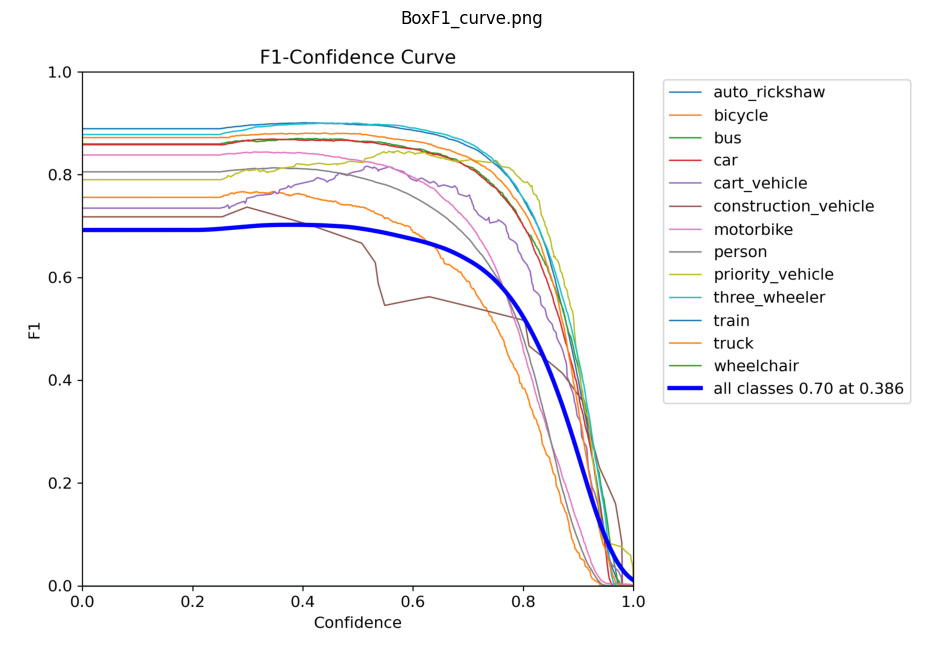

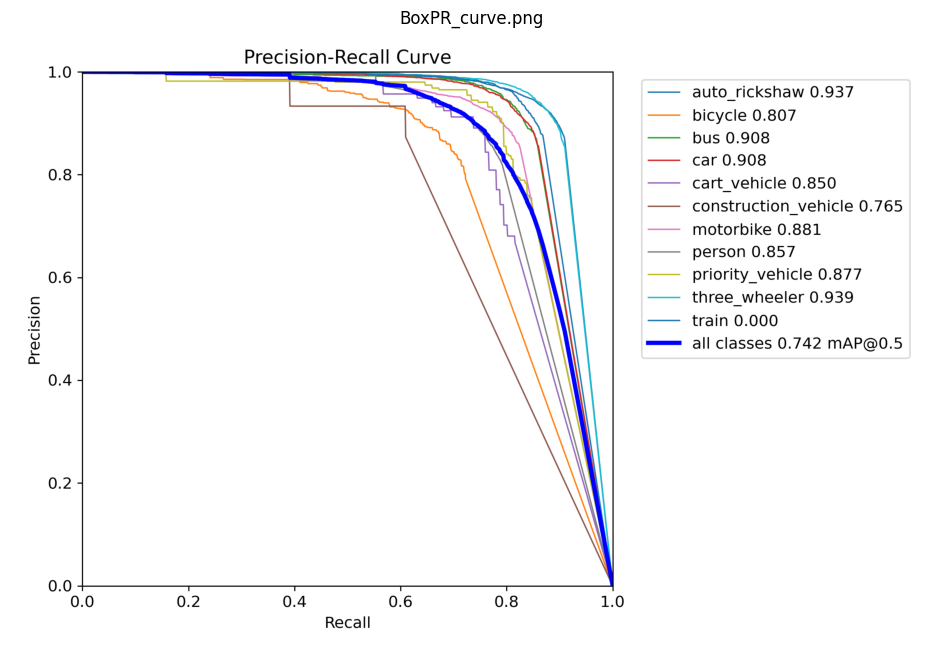

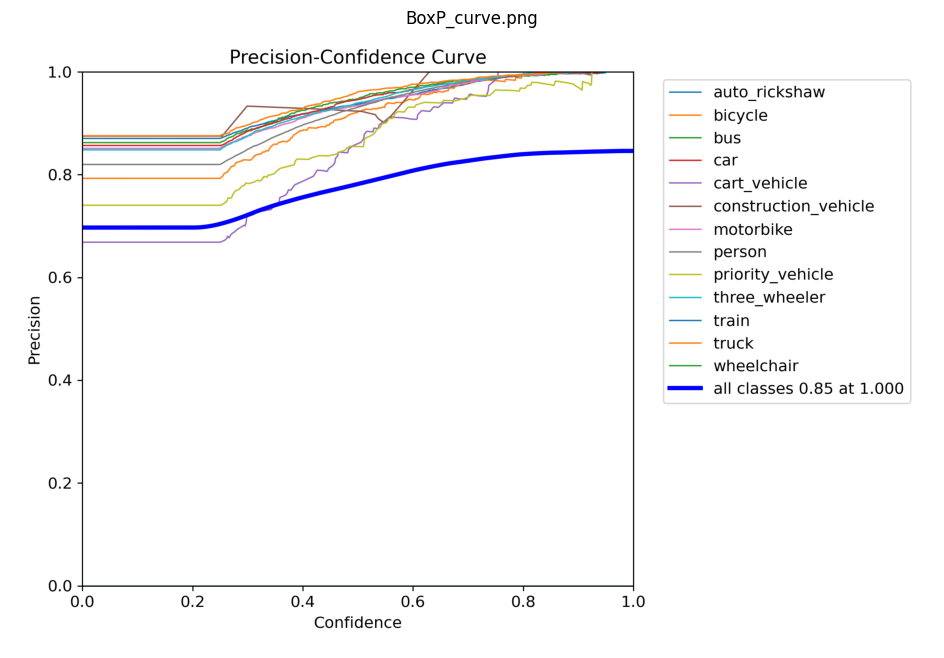

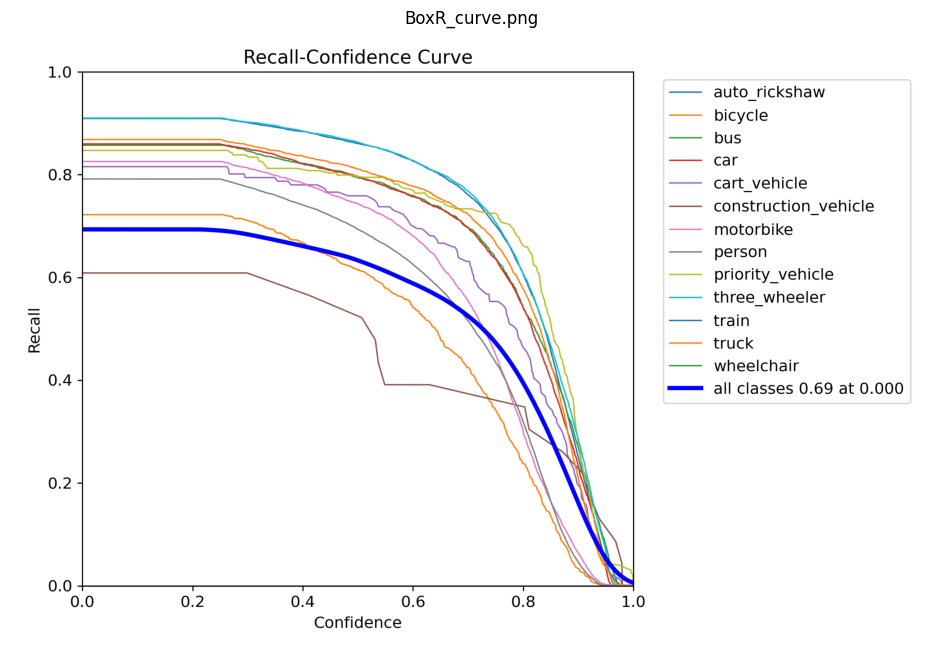

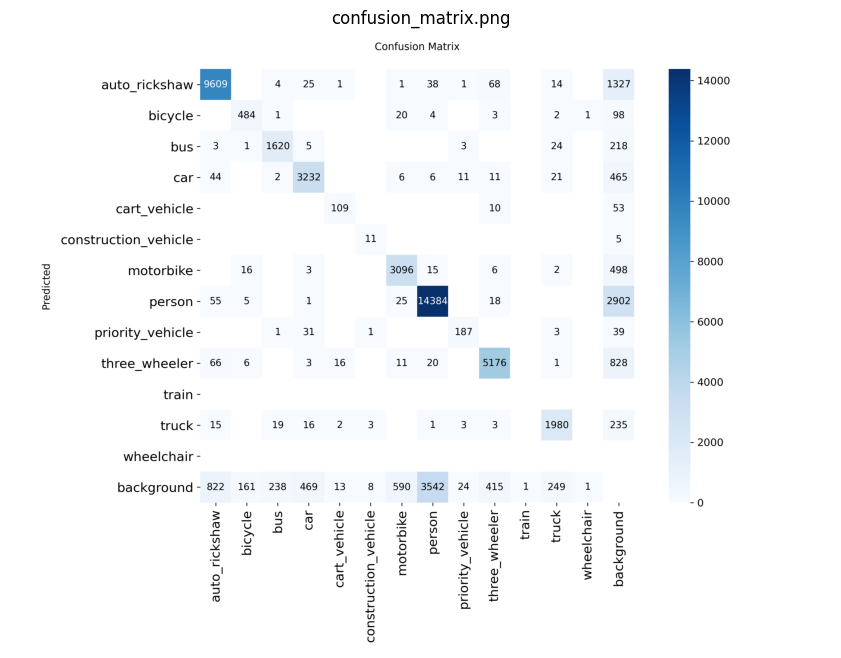

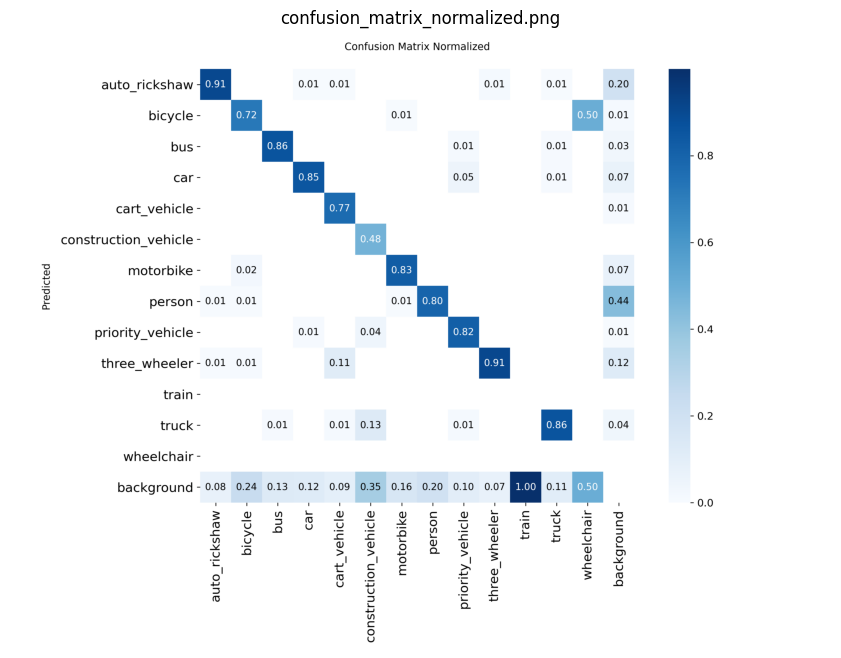

In [18]:
import matplotlib.pyplot as plt
import os

save_dir = metrics.save_dir 


plot_files = [
    "BoxF1_curve.png",
    "BoxPR_curve.png",
    "BoxP_curve.png",
    "BoxR_curve.png",
    "confusion_matrix.png",
    "confusion_matrix_normalized.png"
]


for file in plot_files:
    

    path = os.path.join(save_dir, file)
    if os.path.exists(path):
        img = plt.imread(path)
        plt.figure(figsize=(12,8))

        plt.imshow(img)
        plt.axis('off')
        plt.title(file)
        plt.show()